# **Advanced Data Science Capstone: Automated Image Processing for Breast Tumor Biopsies**

## **Feature Creation Notebook**
Author: Fernando M. Delgado Chaves


## 2. Results

Import the dataframe from the previous step.

In [1]:
import pandas as pd

data = pd.read_csv('cleansed_featEng_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,diagnosis,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,0.501591,0.289880,0.348757,0.379798,0.141323,0.082589,0.125660,0.119387,0.253836,0.084539,0.091110,0.303571,0.347553,0.233590,0.222878
1,M,0.449417,0.514309,0.635686,0.509596,0.211247,0.094303,0.162922,0.150831,0.389847,0.205690,0.127006,0.360075,0.483590,0.403706,0.213433
2,M,0.489290,0.430351,0.518390,0.378283,0.186816,0.093065,0.163688,0.332359,0.357075,0.136179,0.145800,0.123934,0.437364,0.157500,0.142595
3,M,0.141506,0.678613,0.402038,0.518687,0.551179,0.117132,0.038080,0.197063,0.215382,0.193730,0.144660,0.312633,0.712739,0.477035,0.454939
4,M,0.380276,0.379164,0.367793,0.370707,0.157119,0.091275,0.087987,0.088418,0.196818,0.081725,0.044367,0.416844,0.482269,0.295289,0.187853


### 2.4 Model Definition and Training
 
Split the data into train and test.

In [2]:
X = data.drop(['diagnosis'], axis=1)
y = data.diagnosis

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In this case, we built two baseline ML models that were reviewed in the previous courses in this specialization diploma: Random Forest and Support Vector Machines (SVM). The chosen metric for model evaluation was the accuracy.

#### Random Forest Classification

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Method,Accuracy
0,Random Forest,0.996979


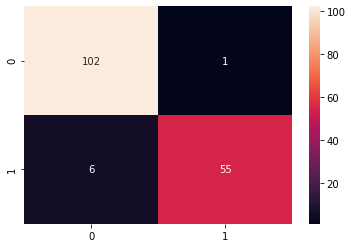

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_train,clf_rf.predict(X_train))
methods = pd.DataFrame({'Method': ['Random Forest'], 'Accuracy': [ac]})
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
methods.head()

#### SVM

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Method,Accuracy
0,Random Forest,0.996979
1,SVM,0.884146


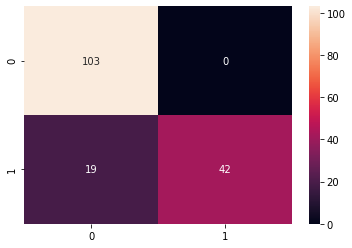

In [6]:
from sklearn import svm 
from sklearn import metrics 

model = svm.SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

ac = accuracy_score(y_test,model.predict(X_test))
methods = methods.append({'Method': 'SVM', 'Accuracy': ac}, ignore_index=True)
cm = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
methods

In this case, the Random Forest method yielded excellent results, with an accuracy of 99.7%. 

## 3. Discussion

Since the initial diagnostic data set was generated in order to discriminate between two specific classes of tumors, supervised learning techniques would be the most appropriate for its analysis. 

Feature engineering identified the following 15 key features:
1. 'area_mean'
1. 'smoothness_mean'
1. 'concave points_mean'
1. 'symmetry_mean'
1. 'fractal_dimension_mean'
1. 'texture_se'
1. 'area_se'
1. 'smoothness_se'
1. 'concave points_se'
1. 'symmetry_se'
1. 'fractal_dimension_se'
1. 'texture_worst'
1. 'smoothness_worst'
1. 'symmetry_worst'
1. 'fractal_dimension_worst'

The classification carried out during the supervised learning process allowed the generation of a **Random Forest-based model** capable of differentiating between benign and malignant tumors with an accuracy of 99.7%. Although in the original work of Street et al. 1993, three attributes were finally taken for classification, the success rate was somewhat lower. It is possible that, by transforming or combining the attributes, with greater knowledge of tumor physiopathology, it is possible to generate a set of attributes that provide greater performance.

In a remarkable way, the diagnostic potential of the methodology proposed in this work can be easily extrapolated to other types of tumors, since the physiopathological characteristics of the tumor tissue involve a mesenchymal cell architecture, common to most tumors. This is due to the fact that tumour cells tend to go through a previous stage of differentiation with great proliferative capacity. It is therefore common to find in these cells characteristics that allow establishing a demarcation criterion with respect to the rest of the cells in their environment, such as the fragmented nucleus, the formation of syncites or the loss of cellular adhesion. In this sense, artificial intelligence techniques could assist and support biomedical research.